### RNN con california housing

In [1]:
# Tratamiento de datos.
import numpy as np
import pandas as pd

# Visualizaciones.
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error,mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing

# Redes neuronales
# import tensorflow as tf
from tensorflow import keras
from keras import layers


## Descarga de datos.

In [3]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

features_name = housing.feature_names

In [4]:
df = pd.DataFrame(X,columns=features_name)

In [5]:
df['Price'] = y

### Primera exploración

In [6]:
print(f'Tamaño de dataset: {df.shape}')
print('\nInformacion de las columnas:')
print(df.info())
print('\nEstadisticas descriptivas')
print(df.describe())

Tamaño de dataset: (20640, 9)

Informacion de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadisticas descriptivas
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462

In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


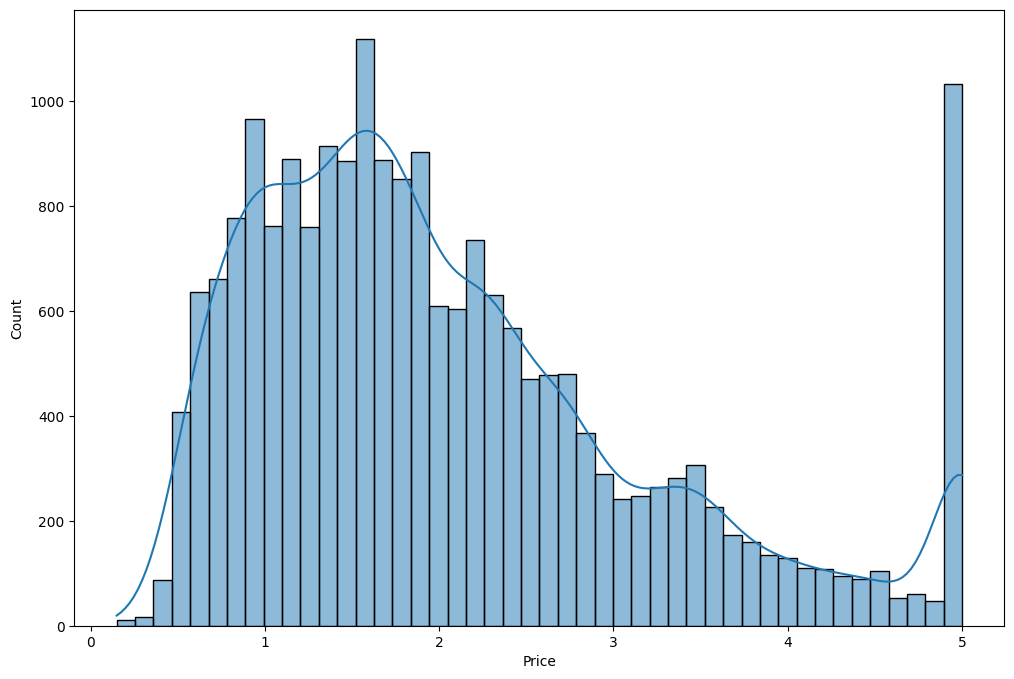

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(df['Price'],kde=True);

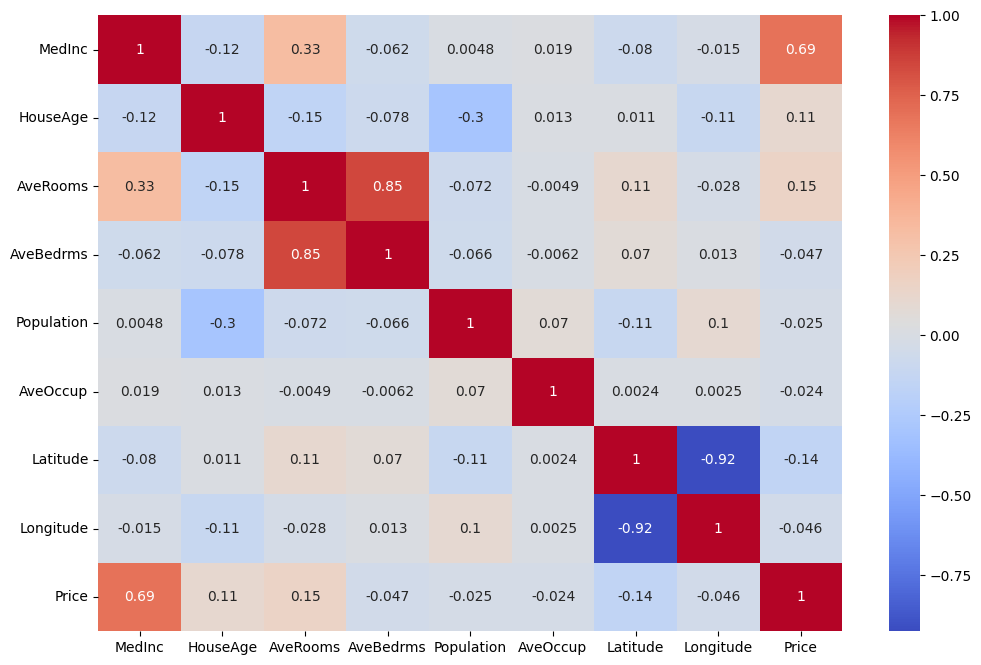

In [9]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm');

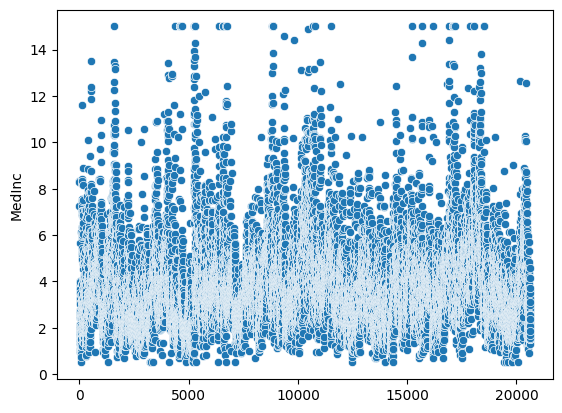

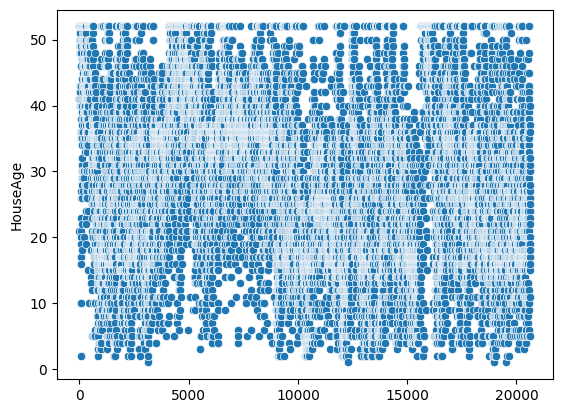

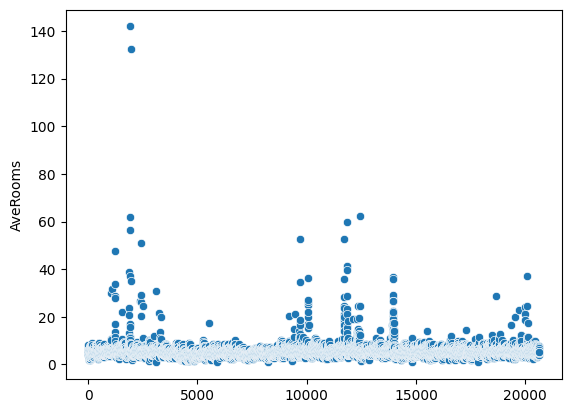

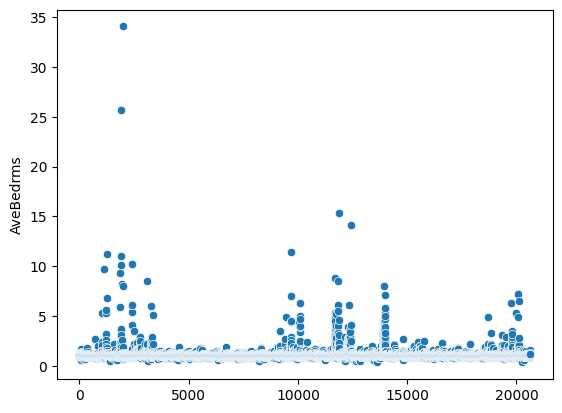

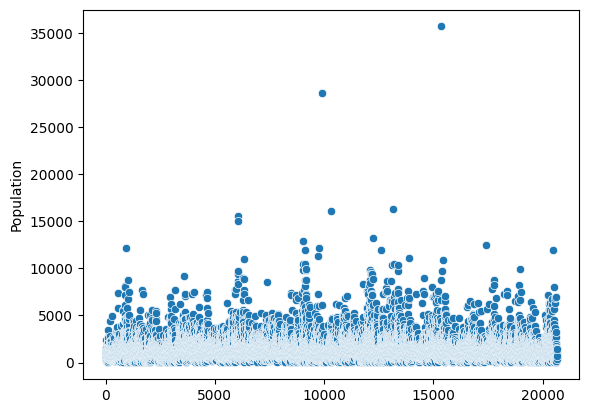

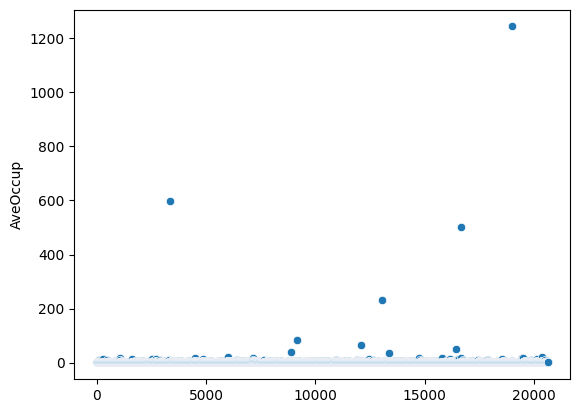

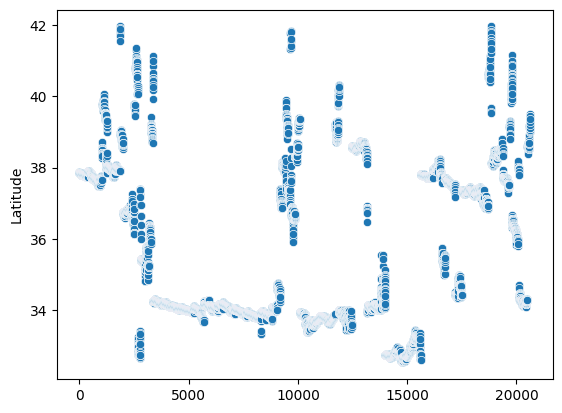

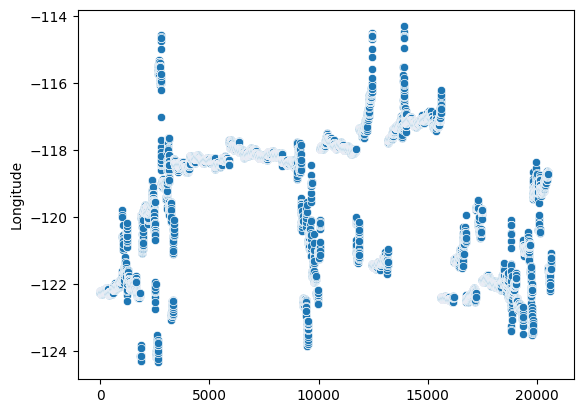

In [10]:
for feature in features_name:
    sns.scatterplot(df[feature])
    plt.show()

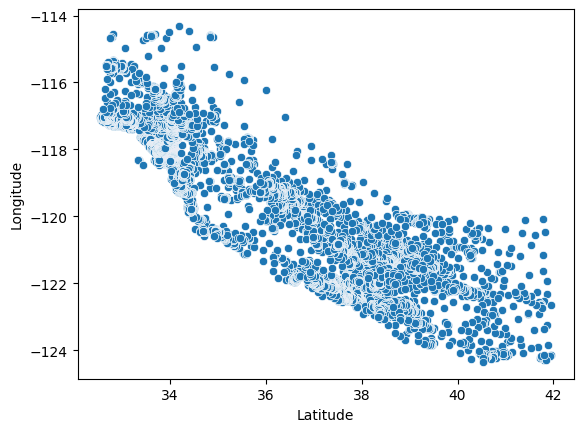

In [11]:
sns.scatterplot(x=df['Latitude'],y=df['Longitude']);

### Preprocesado de datos.

In [12]:
# Divir train y test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=73)

# Escalamiento de datos.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
## Construir el modelo.
def construir_modelo(input_shape,learning_rate=0.001):
    model = keras.Sequential([

        layers.Dense(128, activation='relu',input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dropout(0.30),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.30),
        layers.Dense(32,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.30),
        layers.Dense(16, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.20),
        layers.Dense(1)
    ])
    optimizador = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizador,metrics=['mae'])

    return model

In [14]:
model = construir_modelo(input_shape=X_train_scaled.shape[1])
model.summary();

c:\Users\Abdon.RAMIREZ-BRICEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,513 (48.88 KB)

 Non-trainable params: 480 (1.88 KB)

In [15]:
## callback de entrenamiento.

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=30,
                                               min_delta=0.01,
                                               restore_best_weights=True,
                                               )

reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                              patience=10,
                                              min_lr=0.00001,
                                              monitor='val_loss')


In [16]:
history = model.fit(X_train_scaled,
                    y_train,
                    validation_split=0.2,
                    epochs=300,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr]
                    )

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.6563 - mae: 1.7314 - val_loss: 0.9287 - val_mae: 0.6309 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1818 - mae: 0.8203 - val_loss: 0.5522 - val_mae: 0.5109 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8364 - mae: 0.6854 - val_loss: 0.5482 - val_mae: 0.4892 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7380 - mae: 0.6330 - val_loss: 0.7136 - val_mae: 0.4654 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6164 - mae: 0.5833 - val_loss: 0.5431 - val_mae: 0.4657 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5818 - mae: 0.5605 - val_loss: 0.6131 - val_mae: 0.4628 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5716 - mae: 0.5504 - val_loss: 0.5889 - val_mae: 0.4604 - learning_rate: 0.0010

In [17]:
test_mse,test_mae = model.evaluate(X_test_scaled,y_test,verbose=0)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

rmse= root_mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test, y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


In [18]:
print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test mape: {mape:.4f}')
print(f'Test rmse: {rmse:.4f}')
print(f'r2: {r2:.4f}')


Test MSE: 0.3003
Test MAE: 0.3827
Test mape: 0.2284
Test rmse: 0.5480
r2: 0.7785


In [19]:
y.min()

np.float64(0.14999)

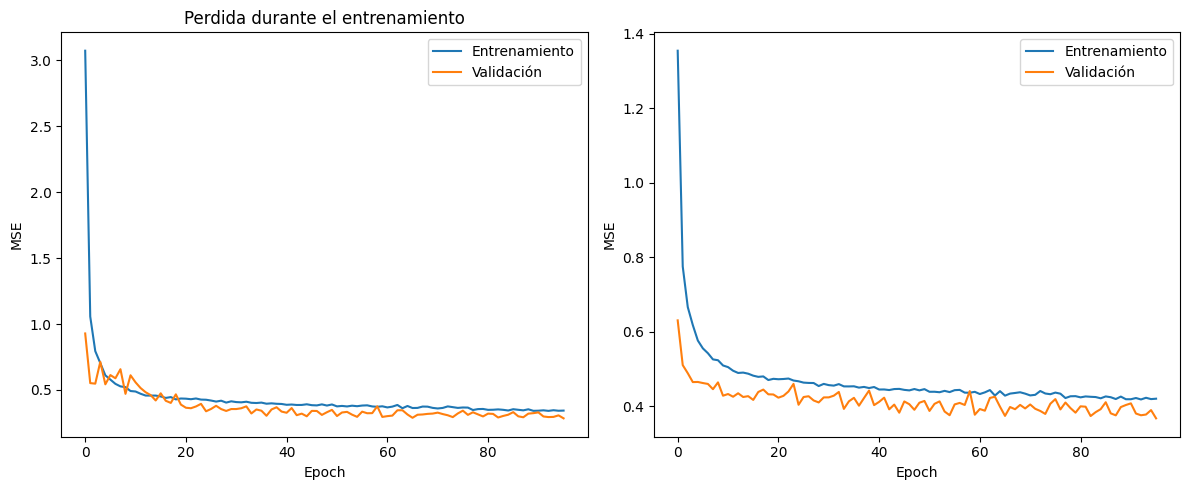

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Entrenamiento')

plt.plot(history.history['val_loss'],label='Validación')

plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.legend();

plt.subplot(1,2,2)

plt.plot(history.history['mae'],label='Entrenamiento')

plt.plot(history.history['val_mae'],label='Validación')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.legend();
 
plt.tight_layout()
plt.show()


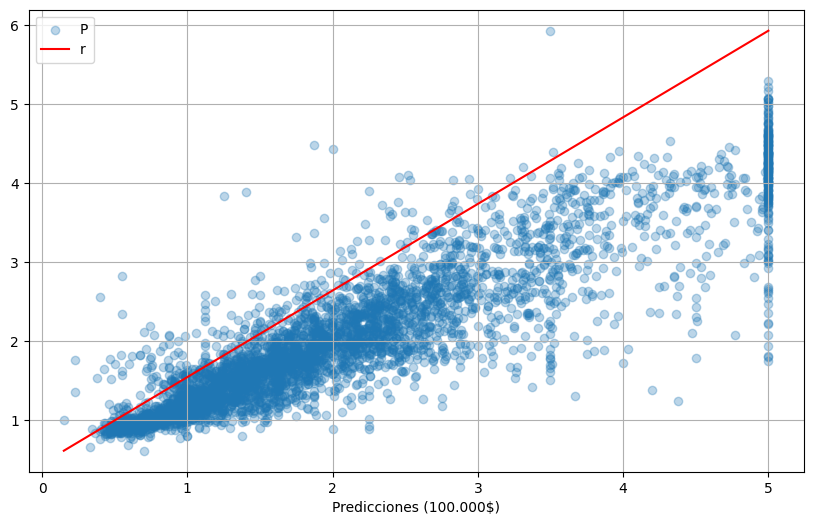

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],color='r')
plt.xlabel('Precios reales (100.000$)')
plt.xlabel('Predicciones (100.000$)')
plt.legend('Prediccion vs Real')
plt.grid(True)
plt.show()

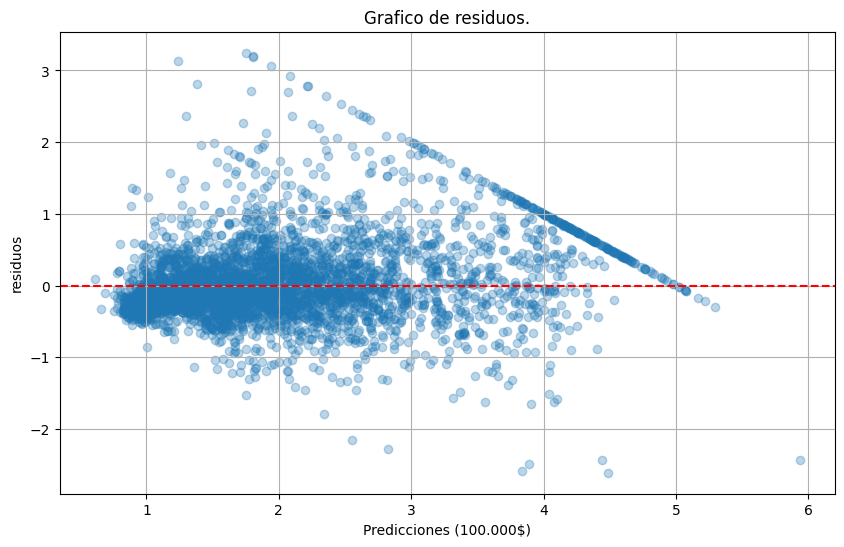

In [22]:
residuos = y_test - y_pred.flatten()

plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuos,alpha=0.3)
plt.axhline(y=0,color='r',linestyle='--')

plt.xlabel('Predicciones (100.000$)')
plt.ylabel('residuos')

plt.title('Grafico de residuos.')

plt.grid(True)

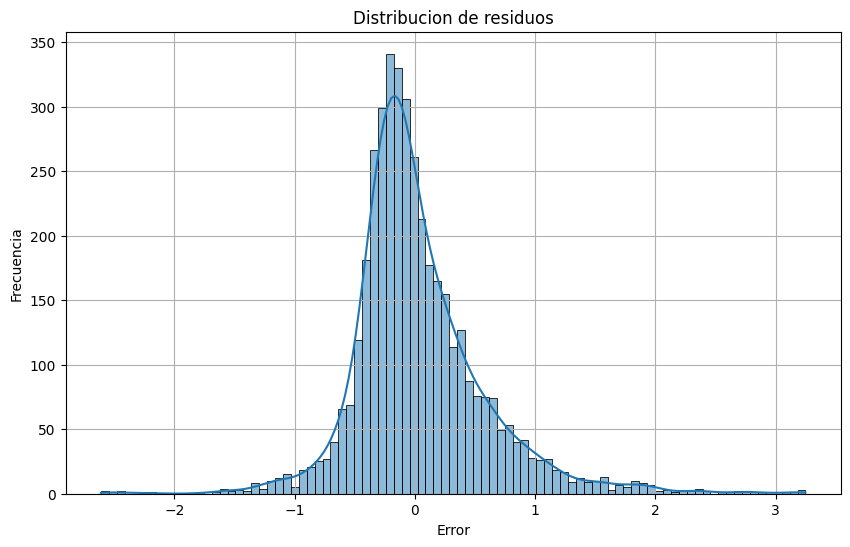

In [23]:
plt.figure(figsize=(10,6))

sns.histplot(residuos,kde=True)
plt.title('Distribucion de residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled,y_train)

importances = rf_model.feature_importances_

In [26]:
indices = np.argsort(importances)

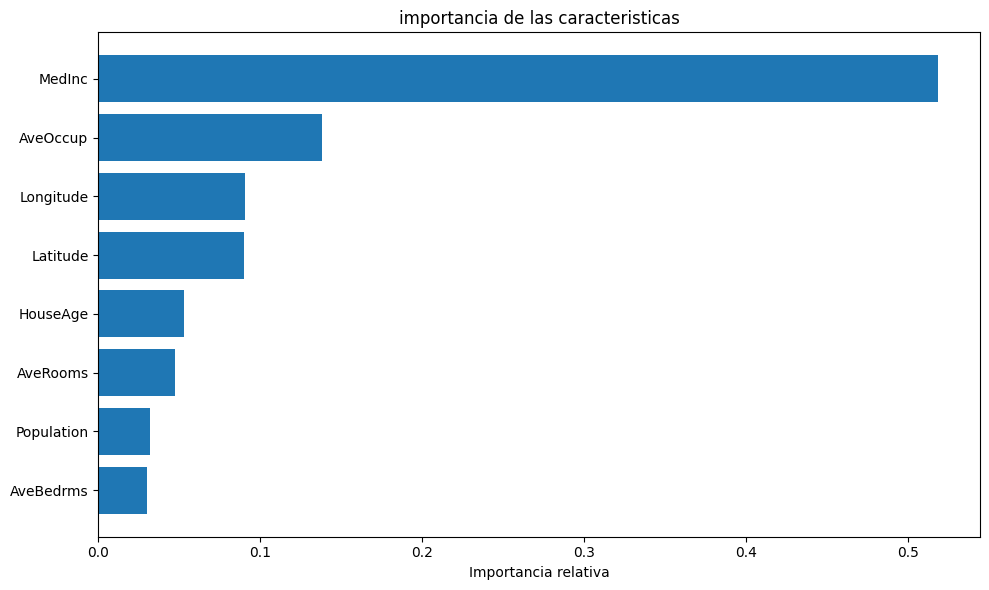

In [27]:
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)),importances[indices],align='center')

plt.yticks(range(len(indices)), [features_name[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.title('importancia de las caracteristicas')

plt.tight_layout();